In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_vx import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

#from pycupid import *

from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

def load_data(fits_path):
    hdu = fits.open(fits_path)[0]
    data = hdu.data
    wcs = WCS(hdu.header)

    if data.ndim>3:
        # droping out the stokes dimension
        data = np.ascontiguousarray(data[0])
        wcs = wcs.dropaxis(3)

        if data.shape[0]==1:
            # in case data is not a cube but an image
            data = np.ascontiguousarray(data[0])
            wcs = wcs.dropaxis(2)
    
    # in case NaN values exist on data
    mask = np.isnan(data)
    if np.any(mask): data = ma.masked_array(data, mask=mask)

    return data,wcs,hdu

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

ModuleNotFoundError: No module named 'hdmclouds_vx'

In [ ]:
#fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/images/Orion.cont.image.fits'
fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data, wcs, hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

In [3]:
preprocessing(data, wcs)

interactive(children=(FloatSlider(value=6.833755925097559, description='back_level', max=13.667511850195117, m…

[INFO] Number of usable pixels: 6622


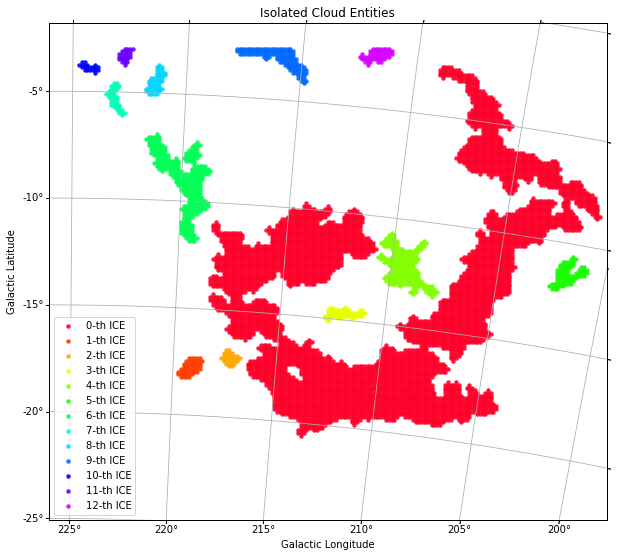

Isolated Cloud Entity 0: 5521 pixels of significant emission.
Isolated Cloud Entity 1: 52 pixels of significant emission.
Isolated Cloud Entity 2: 32 pixels of significant emission.
Isolated Cloud Entity 3: 53 pixels of significant emission.
Isolated Cloud Entity 4: 228 pixels of significant emission.
Isolated Cloud Entity 5: 84 pixels of significant emission.
Isolated Cloud Entity 6: 332 pixels of significant emission.
Isolated Cloud Entity 7: 40 pixels of significant emission.
Isolated Cloud Entity 8: 53 pixels of significant emission.
Isolated Cloud Entity 9: 127 pixels of significant emission.
Isolated Cloud Entity 10: 21 pixels of significant emission.
Isolated Cloud Entity 11: 26 pixels of significant emission.
Isolated Cloud Entity 12: 53 pixels of significant emission.
####################################################################################################


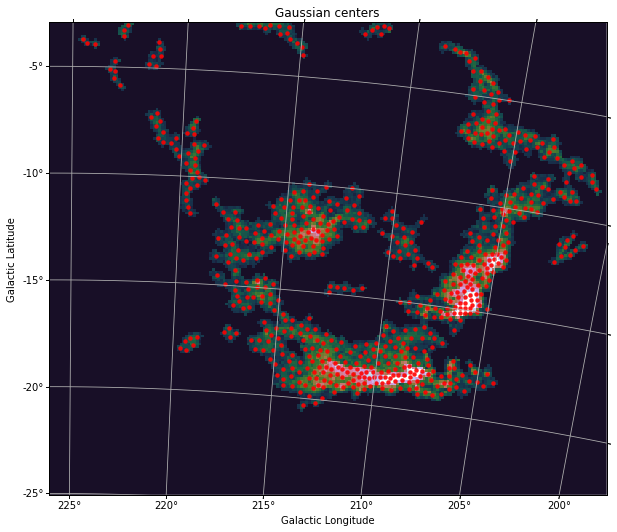

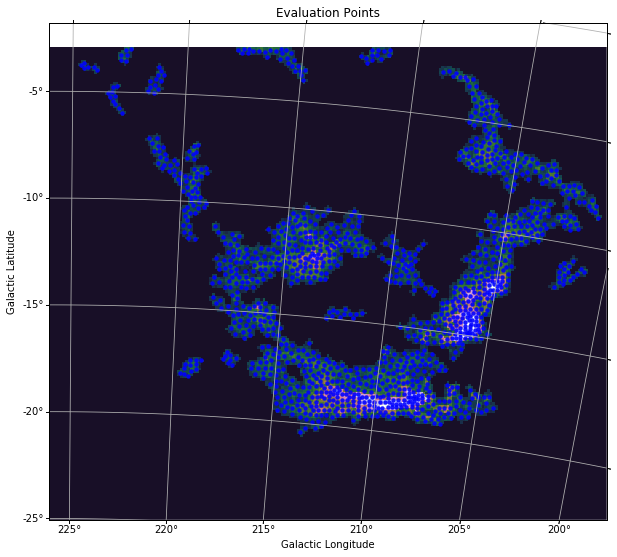

In [4]:
hdmc = HDMClouds(data, back_level=1.00798, wcs=wcs, verbose=True, compression=0.1)

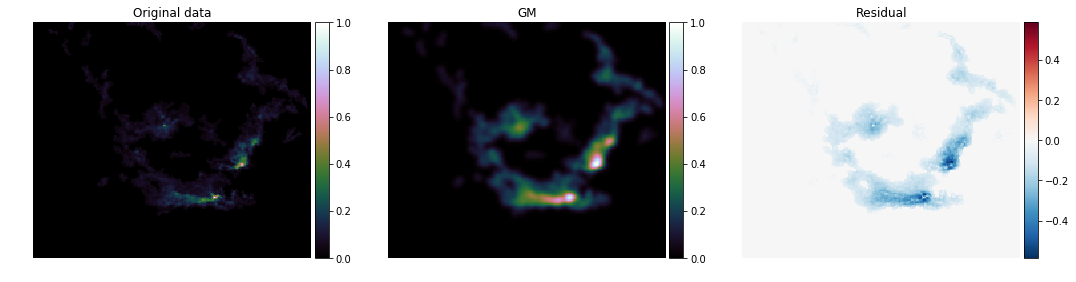

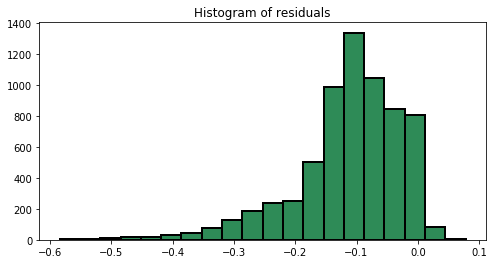

RESIDUAL STATS
RMS of residual: 0.060487754971080394
Inf norm of residual: 0.5840915182624745
Variance of residual: 0.0032514155025744735
Normalized flux addition: 1.5365388103528657
Normalized flux lost: 0.005131824981239283


In [5]:
hdmc.get_residual_stats();

In [6]:
hdmc.build_gmr()

---------------------------------------------
Building GM for Isolated Cloud Entity 0
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.022542311095063897
Inf norm of residual: 0.37795009962556847
Variance of residual: 0.0004968457427081682
Normalized flux addition: 0.11276257190058718
Normalized flux lost: 0.0700661120868941


---------------------------------------------
Building GM for Isolated Cloud Entity 1
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.010451260369753905
Inf norm of residual: 0.031860238226108034
Variance of residual: 0.00010689348448291611
Normalized flux addition: 0.09574767122975292
Normalized flux lost: 0.06559203100023614


---------------------------------------------
Building GM for Isolated Cloud Entity 2
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.01142965288510902
Inf norm of residual: 0.03654792043130685
Variance of residual: 0.0001277196596526539
Normali

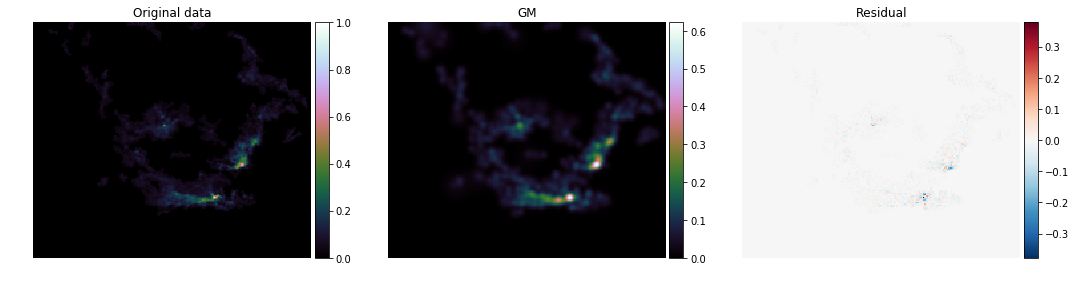

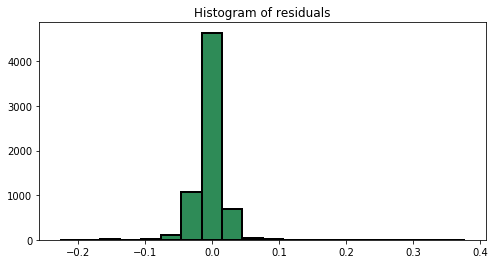

RESIDUAL STATS
RMS of residual: 0.008955796443212325
Inf norm of residual: 0.37795009962556847
Variance of residual: 7.983866164238685e-05
Normalized flux addition: 0.11506176027330103
Normalized flux lost: 0.06905627386142021


In [7]:
hdmc.gwwet_residual_stats();

# Test with the old method

In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

#from pycupid import *

from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

def load_data(fits_path):
    hdu = fits.open(fits_path)[0]
    data = hdu.data
    wcs = WCS(hdu.header)

    if data.ndim>3:
        # droping out the stokes dimension
        data = np.ascontiguousarray(data[0])
        wcs = wcs.dropaxis(3)

        if data.shape[0]==1:
            # in case data is not a cube but an image
            data = np.ascontiguousarray(data[0])
            wcs = wcs.dropaxis(2)
    
    # in case NaN values exist on data
    mask = np.isnan(data)
    if np.any(mask): data = ma.masked_array(data, mask=mask)

    return data,wcs,hdu

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

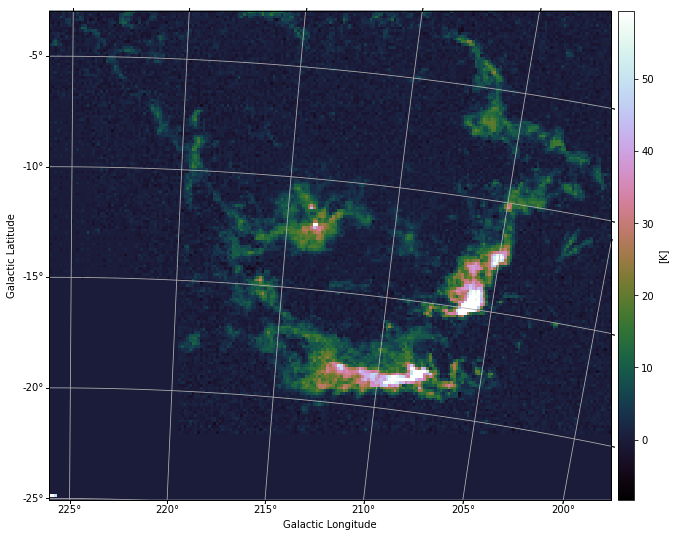

In [2]:
#fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/images/Orion.cont.image.fits'
fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data, wcs, hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

[INFO] Number of usable pixels: 6622


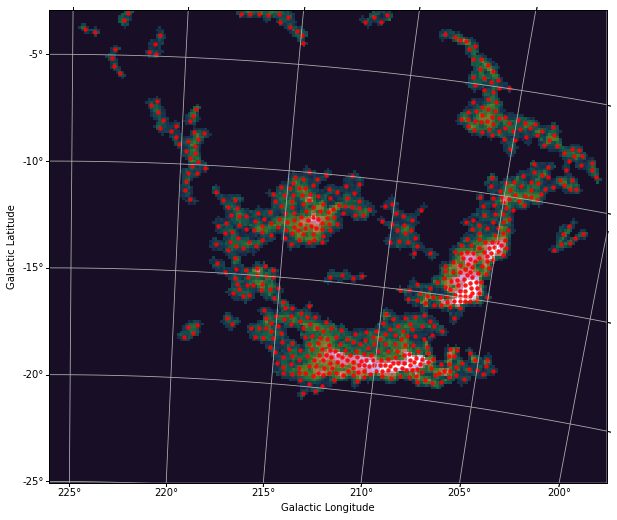

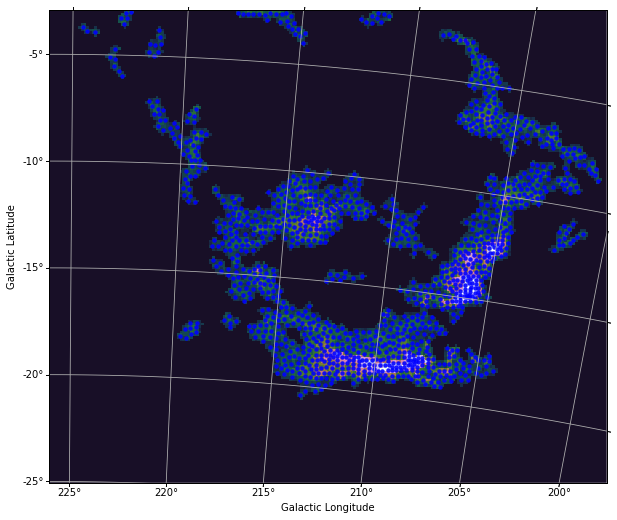

In [4]:
hdmc = HDMClouds(data, back_level=1.00798, wcs=wcs, verbose=True, n_center=662)

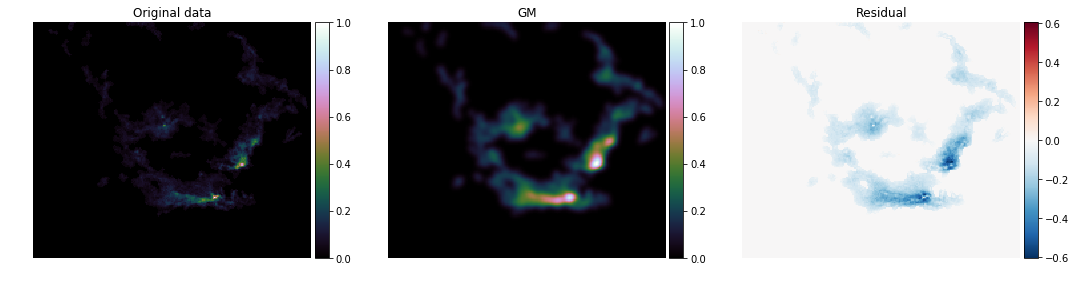

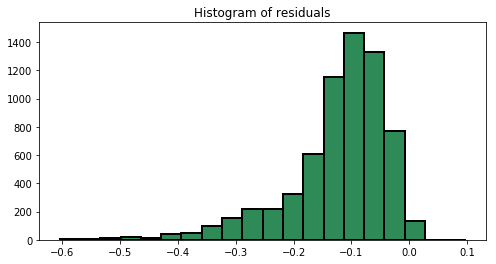

RESIDUAL STATS
RMS of residual: 0.06375232624097793
Inf norm of residual: 0.604561412881535
Variance of residual: 0.003583248586248414
Normalized flux addition: 1.6656792494076273
Normalized flux lost: 0.001394670088658941


In [5]:
hdmc.get_residual_stats();

In [6]:
hdmc.build_gmr()

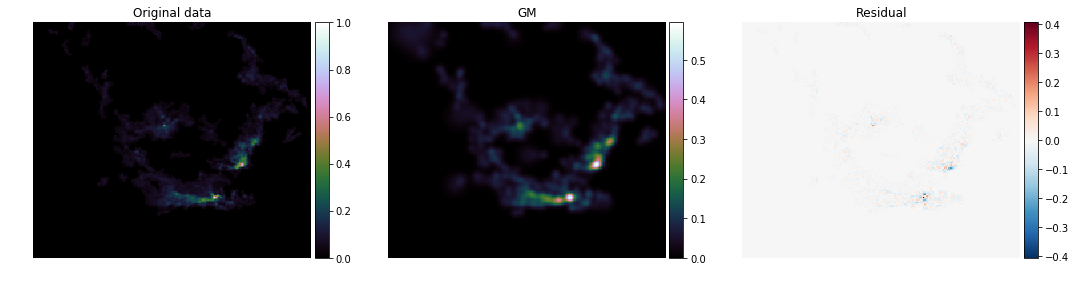

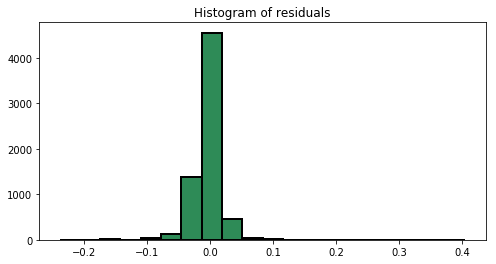

RESIDUAL STATS
RMS of residual: 0.009467551621184279
Inf norm of residual: 0.40530372183159913
Variance of residual: 8.922312360396842e-05
Normalized flux addition: 0.12056351089694345
Normalized flux lost: 0.07189560750734672


(0.009467551621184279,
 8.922312360396842e-05,
 0.12056351089694345,
 0.07189560750734672)

In [7]:
hdmc.get_residual_stats()